# Clustering: Movie Attributes

### Steps
#### 1. z-scale inflated budget
#### 2. Select 'replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget'
#### 3. Factor analysis for mixed data to reduce dimension. n_components = 2. 
#### 4. Hierarchical Clustering. K = 10. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from light_famd import FAMD
import prince
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pickle

In [3]:
brand_extras = pd.read_csv('../data_concat/brands_with_extras_kmodes.csv')

In [4]:
brand_extras.isna().sum()

brand_ods_id                         0
replace                              0
released_on                          0
ticker_symbol                      197
genres                               0
data_profile_dcs_uid                 0
data_profile_channel_type            0
data_profile_source_type             0
data_affiliation_active_flag         0
data_affiliation_start_date_key      0
data_affiliation_end_date_key        0
genre_list                           0
top_genre                            0
released_year                        0
year_bin                             0
budget                               0
production_company                   0
rating                               0
source                               0
franchise                            0
DomesticGross                        0
genre_grouped                        0
inflated_budget                      0
budget_cat                           0
inflated_boxoffice                   0
year_q_bin               

In [5]:
brand_extras.T

,0,1,2,3,4,5,6,7,8,9,...,516,517,518,519,520,521,522,523,524,525
brand_ods_id,41301,25859,44895,10617,10607,13370,13731,10681,10645,16912,...,77544,91708,10654,12271,41315,60789,60626,121670,105354,130372
replace,Blade Runner 2049,Geostorm,Ready Player One,Fury,Nightcrawler,Crimson Peak,The Hunger Games: Mockingjay - Part 2,Terminator Genisys,Fifty Shades of Grey,The Huntsman: Winter's War,...,Cold War,Trolls World Tour,Cinderella,Chef,A Street Cat Named Bob,Behind the Candelabra,Looper,The Report,The Aeronauts,My Spy
released_on,2017-10-06,2017-10-20,2018-03-29,2014-10-17,2014-10-31,2015-10-16,2015-11-20,2015-07-01,2015-02-13,2016-04-22,...,2018-12-21,2020-04-10,2015-03-13,2014-05-30,2016-11-18,2013-01-26,2012-09-28,2019-11-15,2019-12-06,2020-04-17
ticker_symbol,T,T,T,NaN,NaN,CMCSA,LGF.A,VIA,CMCSA,CMCSA,...,AMZN,CMCSA,DIS,NaN,NaN,NaN,NaN,AMZN,AMZN,NaN
genres,Sci Fi,"Action, Sci Fi","Sci Fi, Action, Thriller","Action, Drama, War","Crime, Thriller, Drama",Horror,"Adventure, Sci Fi, Action","Adventure, Action, Sci Fi","Romance, Drama","Adventure, Action, Drama",...,Drama,"Comedy, Adventure, Animation","Family, Adventure, Drama",Comedy,Comedy,"Biography, Drama","Crime, Action, Thriller, Sci Fi",Drama,"Adventure, Action","Action, Comedy"
data_profile_dcs_uid,45b03b4ab3e6e5781426f83613af0807,ea5eb96fa2d53c68a7fec4a76636c6ff,31e9bbe160e77e8558e35bb5c5bd7089,6c7dc49a1cece02cc80d0826e6424df2,aaec8ee14f2e372b8e35a72ee9613ca1,7034ae8af3651572a1622a96f47334b4,02b7c6aa78a2cd57bd043918c5d5e8c2,d2f99b8dac22b2e68723d8a66d422a2e,d42138ae16d3c385c9dd963d5da3c006,cdec6aa592e773c0a06c1a18475c9137,...,db3946e1f0a37830a23056e1fe3d6047,960854b0b172319f9c1e0ba6ca32bfa2,f185a47fcfc894333ffab8787cefbb38,252ba9809bbbd483ff9de63de583b4a5,51dd6b2835268213e6e0a420e18df54a,5d34d89665f81063456c39e2abfc4ab5,32840ec68dba0b7de0afdb796eccf0f6,b242b6f6bec960229b27a66d2ce125a8,591d73aa762af8606cda117699628902,10ac71b97dcb9afb2c037ebbf5b9363c
data_profile_channel_type,instagram,twitter,facebook,facebook,twitter,twitter,twitter,twitter,facebook,twitter,...,instagram,twitter,facebook,twitter,twitter,twitter,twitter,twitter,twitter,twitter
data_profile_source_type,page,search_term,search_term,search_term,search_term,search_term,search_term,search_term,search_term,handle,...,page,handle,search_term,search_term,search_term,search_term,search_term,search_term,handle,search_term
data_affiliation_active_flag,t,t,t,t,t,t,t,t,t,t,...,t,t,t,t,t,t,t,t,t,t
data_affiliation_start_date_key,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101


## Z-scale inflated_budget

In [6]:
budget_scale = StandardScaler()

In [7]:
pickle.dump(budget_scale, open('budget_scale.pkl', 'wb'))

In [8]:
brand_extras['inflated_budget'] = budget_scale.fit_transform(brand_extras['inflated_budget'].values.reshape(-1, 1))

In [9]:
brand_extras['inflated_boxoffice'] = budget_scale.fit_transform(brand_extras['inflated_boxoffice'].values.reshape(-1, 1))

In [10]:
brand_extras.T

,0,1,2,3,4,5,6,7,8,9,...,516,517,518,519,520,521,522,523,524,525
brand_ods_id,41301,25859,44895,10617,10607,13370,13731,10681,10645,16912,...,77544,91708,10654,12271,41315,60789,60626,121670,105354,130372
replace,Blade Runner 2049,Geostorm,Ready Player One,Fury,Nightcrawler,Crimson Peak,The Hunger Games: Mockingjay - Part 2,Terminator Genisys,Fifty Shades of Grey,The Huntsman: Winter's War,...,Cold War,Trolls World Tour,Cinderella,Chef,A Street Cat Named Bob,Behind the Candelabra,Looper,The Report,The Aeronauts,My Spy
released_on,2017-10-06,2017-10-20,2018-03-29,2014-10-17,2014-10-31,2015-10-16,2015-11-20,2015-07-01,2015-02-13,2016-04-22,...,2018-12-21,2020-04-10,2015-03-13,2014-05-30,2016-11-18,2013-01-26,2012-09-28,2019-11-15,2019-12-06,2020-04-17
ticker_symbol,T,T,T,NaN,NaN,CMCSA,LGF.A,VIA,CMCSA,CMCSA,...,AMZN,CMCSA,DIS,NaN,NaN,NaN,NaN,AMZN,AMZN,NaN
genres,Sci Fi,"Action, Sci Fi","Sci Fi, Action, Thriller","Action, Drama, War","Crime, Thriller, Drama",Horror,"Adventure, Sci Fi, Action","Adventure, Action, Sci Fi","Romance, Drama","Adventure, Action, Drama",...,Drama,"Comedy, Adventure, Animation","Family, Adventure, Drama",Comedy,Comedy,"Biography, Drama","Crime, Action, Thriller, Sci Fi",Drama,"Adventure, Action","Action, Comedy"
data_profile_dcs_uid,45b03b4ab3e6e5781426f83613af0807,ea5eb96fa2d53c68a7fec4a76636c6ff,31e9bbe160e77e8558e35bb5c5bd7089,6c7dc49a1cece02cc80d0826e6424df2,aaec8ee14f2e372b8e35a72ee9613ca1,7034ae8af3651572a1622a96f47334b4,02b7c6aa78a2cd57bd043918c5d5e8c2,d2f99b8dac22b2e68723d8a66d422a2e,d42138ae16d3c385c9dd963d5da3c006,cdec6aa592e773c0a06c1a18475c9137,...,db3946e1f0a37830a23056e1fe3d6047,960854b0b172319f9c1e0ba6ca32bfa2,f185a47fcfc894333ffab8787cefbb38,252ba9809bbbd483ff9de63de583b4a5,51dd6b2835268213e6e0a420e18df54a,5d34d89665f81063456c39e2abfc4ab5,32840ec68dba0b7de0afdb796eccf0f6,b242b6f6bec960229b27a66d2ce125a8,591d73aa762af8606cda117699628902,10ac71b97dcb9afb2c037ebbf5b9363c
data_profile_channel_type,instagram,twitter,facebook,facebook,twitter,twitter,twitter,twitter,facebook,twitter,...,instagram,twitter,facebook,twitter,twitter,twitter,twitter,twitter,twitter,twitter
data_profile_source_type,page,search_term,search_term,search_term,search_term,search_term,search_term,search_term,search_term,handle,...,page,handle,search_term,search_term,search_term,search_term,search_term,search_term,handle,search_term
data_affiliation_active_flag,t,t,t,t,t,t,t,t,t,t,...,t,t,t,t,t,t,t,t,t,t
data_affiliation_start_date_key,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101


## Select variables for clustering

In [11]:
clust_brand_extras = brand_extras[['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']]

In [12]:
clust_brand_extras = clust_brand_extras.set_index('replace')

In [13]:
clust_brand_extras

,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
replace,,,,,,
Blade Runner 2049,Sci Fi,R,Remake,Yes,1.798774,-0.211500
Geostorm,Action,PG-13,Original,No,0.531879,-0.512398
Ready Player One,Sci Fi,PG-13,Not Original,No,1.223805,0.006890
Fury,Action,R,Original,No,0.276011,-0.227987
Nightcrawler,Crime,R,Original,No,-0.827410,-0.513286
...,...,...,...,...,...,...
Behind the Candelabra,Biography,R,Not Original,No,-0.597882,-0.679058
Looper,Crime,R,Original,No,-0.481210,-0.320157
The Report,Drama,R,Not Original,No,-0.844264,-0.683611


In [14]:
clust_brand_extras['rating'].unique()

array(['R', 'PG-13', 'PG', 'G'], dtype=object)

In [15]:
clust_brand_extras['source'].unique()

array(['Remake', 'Original', 'Not Original'], dtype=object)

In [16]:
clust_brand_extras['franchise'].unique()

array(['Yes', 'No'], dtype=object)

## Factor Analysis of mixed data

In [17]:
# https://pypi.org/project/prince/#factor-analysis-of-mixed-data-famd
# https://pypi.org/project/light-famd/#factor-analysis-of-mixed-data-famd

In [18]:
famd = prince.FAMD(n_components = 2)
famd2 = famd.fit(clust_brand_extras)
clust_brand_extras_famd = famd2.row_coordinates(clust_brand_extras)
clust_brand_extras_famd

,0,1
replace,,
Blade Runner 2049,21.004328,7.889627
Geostorm,48.715192,12.904112
Ready Player One,50.388527,-24.747672
Fury,44.398652,41.118481
Nightcrawler,41.115925,44.207834
...,...,...
Behind the Candelabra,45.897628,4.380307
Looper,41.115486,44.203981
The Report,51.156851,5.836486


In [47]:
pickle.dump(famd2, open('famd.pkl', 'wb'))

## Hierarchical Clustering

In [19]:
# Use Silhouette Score to choose the optimal number of clusters
score = []
for n_clusters in list(range(2, 50)):
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
    preds = hc.fit_predict(clust_brand_extras_famd)
    score.append(silhouette_score(clust_brand_extras_famd.values, preds))

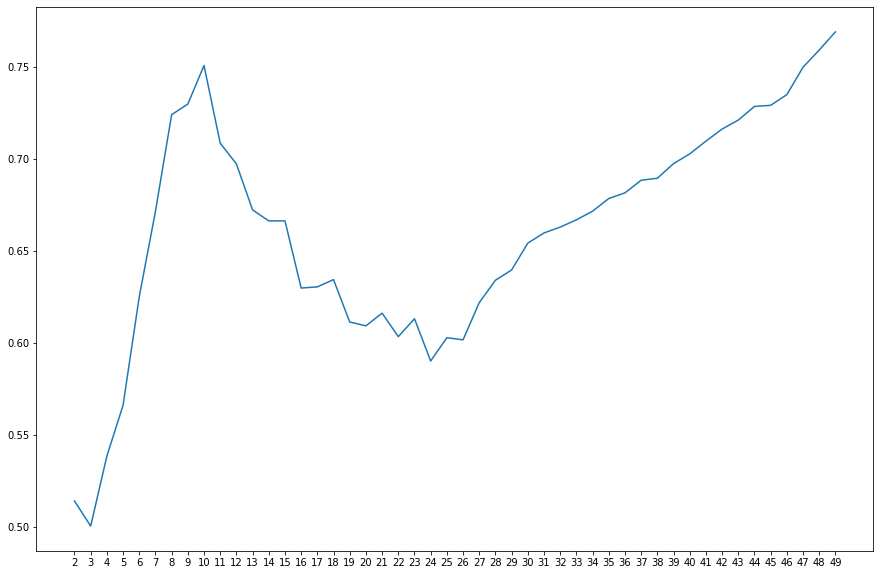

In [20]:
figure(figsize=(15, 10))
plt.plot(list(range(2, 50)), score)
plt.xticks(list(range(2, 50)))
plt.show()

## k = 10

In [21]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='ward')
clusters = hc.fit_predict(clust_brand_extras_famd)

In [22]:
pickle.dump(hc, open('hc.pkl', 'wb'))

In [23]:
# Add clusters to the original dataset
brand_extras['cluster_id'] = clusters

In [24]:
brand_extras.to_csv('esther_cluster.csv')

In [25]:
brand_extras.head(5)

,brand_ods_id,replace,released_on,ticker_symbol,genres,data_profile_dcs_uid,data_profile_channel_type,data_profile_source_type,data_affiliation_active_flag,data_affiliation_start_date_key,...,franchise,DomesticGross,genre_grouped,inflated_budget,budget_cat,inflated_boxoffice,year_q_bin,rank,production_company_bin,cluster_id
0,41301,Blade Runner 2049,2017-10-06,T,Sci Fi,45b03b4ab3e6e5781426f83613af0807,instagram,page,t,101,...,Yes,92054159,Fantasy,1.798774,HighBudget,-0.211500,3,1,Top5,6
1,25859,Geostorm,2017-10-20,T,"Action, Sci Fi",ea5eb96fa2d53c68a7fec4a76636c6ff,twitter,search_term,t,101,...,No,33700160,Action,0.531879,HighBudget,-0.512398,3,1,Top5,9
2,44895,Ready Player One,2018-03-29,T,"Sci Fi, Action, Thriller",31e9bbe160e77e8558e35bb5c5bd7089,facebook,search_term,t,101,...,No,137690172,Fantasy,1.223805,HighBudget,0.006890,3,1,Top5,0
3,10617,Fury,2014-10-17,NaN,"Action, Drama, War",6c7dc49a1cece02cc80d0826e6424df2,facebook,search_term,t,101,...,No,85817906,Action,0.276011,HighBudget,-0.227987,1,193,Top100+,3
4,10607,Nightcrawler,2014-10-31,NaN,"Crime, Thriller, Drama",aaec8ee14f2e372b8e35a72ee9613ca1,twitter,search_term,t,101,...,No,32381218,Thriller,-0.827410,MediumBudget,-0.513286,1,223,Top100+,3


In [26]:
clust_df = pd.DataFrame(brand_extras['cluster_id'].value_counts())
clust_df

,cluster_id
0,93
3,69
7,54
2,54
5,51
1,49
9,45
8,40
6,39
4,32


## Cluster 0: PG-13, Not Original, Not Franchise

In [30]:
brand_extras[brand_extras['cluster_id'] == 0][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
2,Ready Player One,Sci Fi,PG-13,Not Original,No,1.223805,0.006890
12,Tolkien,Biography,PG-13,Not Original,No,-0.672780,-0.663749
13,Black or White,Drama,PG-13,Not Original,No,-0.819859,-0.571138
20,Dear John,Romance,PG-13,Not Original,No,-0.539722,-0.222371
21,The Second Best Exotic Marigold Hotel,Drama,PG-13,Not Original,No,-0.804444,-0.509774


## Cluster 1: Not Original

In [32]:
brand_extras[brand_extras['cluster_id'] == 1][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
8,Fifty Shades of Grey,Romance,R,Not Original,Yes,-0.342019,0.199949
16,The Girl in the Spider's Web: A New Dragon Tat...,Drama,R,Not Original,Yes,-0.332967,-0.508992
22,Fifty Shades Darker,Drama,R,Not Original,Yes,-0.138830,-0.096100
25,Dora and The Lost City of Gold,Action,PG,Not Original,No,-0.258361,-0.089938
28,Kingsman: The Secret Service,Comedy,R,Not Original,Yes,0.490346,-0.002189


## Cluster 2: Others

In [34]:
brand_extras[brand_extras['cluster_id'] == 2][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
23,Zootopia,Adventure,PG,Original,No,1.324734,1.111037
24,Hellboy (2019),Fantasy,R,Remake,No,-0.244071,-0.465179
27,Pet Sematary,Horror,R,Remake,No,-0.658490,-0.415618
29,The Good Dinosaur,Adventure,PG,Original,No,1.931572,-0.029784
32,The Resurrection of Gavin Stone,Romance,PG,Original,No,-0.928777,-0.674291


## Cluster 3: R, Original, Not Franchise

In [36]:
brand_extras[brand_extras['cluster_id'] == 3][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
3,Fury,Action,R,Original,No,0.276011,-0.227987
4,Nightcrawler,Crime,R,Original,No,-0.827410,-0.513286
5,Crimson Peak,Horror,R,Original,No,-0.110807,-0.520375
14,Chappie,Action,R,Original,No,-0.203292,-0.517821
15,Booksmart,Comedy,R,Original,No,-0.872844,-0.574039


## Cluster 4: PG/G/PG-13, Franchise

In [37]:
brand_extras[brand_extras['cluster_id'] == 4][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
31,Teen Titans Go! to the Movies,Animation,PG,Not Original,Yes,-0.813093,-0.423926
35,The SpongeBob Movie: Sponge Out of Water,Animation,PG,Not Original,Yes,0.182063,0.183028
43,Fantastic Four,Sci Fi,PG-13,Remake,Yes,0.891115,0.138777
50,The LEGO NINJAGO Movie,Action,PG,Not Original,Yes,0.084739,-0.051415
80,The Star,Animation,PG,Not Original,Yes,-0.660493,-0.475541


## Cluster 5: R, Original, Not Franchised, mostly low budget and low box office

In [38]:
brand_extras[brand_extras['cluster_id'] == 5][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
10,Lone Survivor,Thriller,R,Not Original,No,-0.331274,-0.007447
26,Inside Llewyn Davis,Drama,R,Not Original,No,-0.786075,-0.614291
38,Deliver Us From Evil,Thriller,R,Not Original,No,-0.495612,-0.216870
42,A Star is Born,Romance,R,Not Original,No,-0.434812,0.397481
45,The Warrior Queen of Jhansi,Drama,R,Not Original,No,-0.958586,-0.685310


## Cluster 6: High Budget + High Box Office

In [39]:
brand_extras[brand_extras['cluster_id'] == 6][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
0,Blade Runner 2049,Sci Fi,R,Remake,Yes,1.798774,-0.211500
17,Finding Dory,Adventure,PG,Original,Yes,2.085841,1.874789
59,Ralph Breaks the Internet,Adventure,PG,Original,Yes,1.587537,1.978049
73,Hotel Transylvania 2,Family,PG,Original,Yes,0.274548,0.218789
79,Ice Age: Collision Course,Animation,PG,Original,Yes,0.639738,-0.348798


## Cluster 7: PG-13, not original, Franchise. Mostly High Budget + High Box Office

In [40]:
brand_extras[brand_extras['cluster_id'] == 7][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
6,The Hunger Games: Mockingjay - Part 2,Adventure,PG-13,Not Original,Yes,1.507682,0.816178
9,The Huntsman: Winter's War,Adventure,PG-13,Not Original,Yes,0.791960,0.182763
41,Pitch Perfect 2,Musical,PG-13,Not Original,Yes,-0.511575,0.296626
46,Insurgent,Adventure,PG-13,Not Original,Yes,0.736973,0.899241
54,Star Trek Beyond,Adventure,PG-13,Not Original,Yes,1.857509,0.150366


## Cluster 8: PG-13, Original, Franchise

In [45]:
brand_extras[brand_extras['cluster_id'] == 8][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
7,Terminator Genisys,Adventure,PG-13,Original,Yes,1.430611,1.663417
11,The Expendables 3,Thriller,PG-13,Original,Yes,0.584660,-0.476227
18,War for the Planet of the Apes,Adventure,PG-13,Original,Yes,1.306921,0.071206
36,Ocean's 8,Crime,PG-13,Original,Yes,0.059863,0.808772
82,Tyler Perry's Boo 2! A Madea Halloween,Comedy,PG-13,Original,Yes,-0.660493,-0.437115


## Cluster 9: PG-13, Original, not Franchise. Mostly Low Budget + Low Box Office

In [46]:
brand_extras[brand_extras['cluster_id'] == 9][['replace', 'top_genre', 'rating', 'source', 'franchise', 'inflated_budget', 'inflated_boxoffice']].head()

,replace,top_genre,rating,source,franchise,inflated_budget,inflated_boxoffice
1,Geostorm,Action,PG-13,Original,No,0.531879,-0.512398
33,Lowriders,Drama,PG-13,Original,No,-0.944934,-0.654304
48,Isle of Dogs,Adventure,PG-13,Original,No,-0.958586,-0.363021
100,Escape Room,Horror,PG-13,Original,No,-0.829974,-0.404366
111,The Visit,Horror,PG-13,Original,No,-0.881515,-0.338446


In [49]:
brand_extras.to_csv('Esther_cluster.csv')